#### Luis Pedro Pérez
##### 22008067

Se procede a realizar un análisis basado en datos bancarios para seleccionar variables que puedan apoyar a un estudio de marketing

Se importa la librería pandas para realizar la carga, manipulación y visualización del dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

Se carga el dataset y se define como data

In [2]:
data = pd.read_csv('Semana8/BankChurners.csv')

Se utiliza de la librería summarytools el módulo dfSummary para poder visualizar el comportamiento de las variables

In [3]:
from summarytools import dfSummary

Se describe como se compone el dataset por medio de la función describe()

In [4]:
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


Se extrae la forma del dataset

In [5]:
# Forma de dataset
data.shape

(10127, 23)

Se visualiza la composición y distribución de las columnas del dataset

In [6]:
dfSummary(data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,CLIENTNUM[int64],Mean (sd) : 739177606.3 (36903783.5)min < med < max:708082083.0 < 717926358.0 < 828343083.0IQR (CV) : 60106762.5 (20.0),"10,127 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAC40lEQVR4nO3YsW7aUBSA4XMhQdcQ7hUhJVuWbonUASkLD9AxD5tH6MDQtRm6MGWJUBAyjYOFZdyhTdWqCuBrEDnk/2aObVm/uAdMURQCvHW1fT8AsImjdR8wxkQi0gi8/qIoinngLPDHylCNMVG3271xznVCLj6bzabGmFtiRVXrvlEbzrnOYDCYe+/TMheO49gOh8POZDJpiAihopK1R7+IiPc+7fV6zwHXjwJmgP/wYwoqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQ4WjfD3CIjDGRiDQCxxdFUcy3+TyHgFC3zBgTdbvdG+dcJ2R+NptNjTG3xPovQt2+hnOuMxgM5t77tMxgHMd2OBx2JpNJQ0QI9S87DTXP82MRccaY0EuoPQa992mv13suO5fnuZN3+s5W2VmoSZIcZ1n26eLiol6v10t9s7x4b8cg7+x1Owt1sVgcWWub/X4/PT8/n5adf4/HIO/sdTvfUVutVtAR+Fu01YdRYl/vrOK/FSK//u5cBs6uXFn4MXVgKvwusKenp5+9963Q+yZJ8vHk5GRUq9WysvPrVhZCPSBVdtwsy6yIXF1fX389Ozublb33/f195+7u7kO/3/9edm3ZZGUh1FdUOAbdcrk83vbzbKLKjvs7tKa1NgtZO6bTaSRSaW1ZubK86VAr/r1VZV8KPgazLLN5nl+lafpFREL3zEpCYnkJ7a3aKNQ4jm3ZCz89PVkRkSRJ7Hg8bpadf3h4aIceY1X3pZdj8PLy8lu73f5RZvbx8dGORqNmHMet8Xi8KDNb9Z1Vmd/nvTfp6yeJ80MUZUbkNQAAAABJRU5ErkJggg=="">",0(0.0%)
2,Attrition_Flag[object],1. Existing Customer2. Attrited Customer,"8,500 (83.9%)1,627 (16.1%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABMUlEQVR4nO3bQWrDMBRF0adiQjORMAYvxovoYrsI7cYYa9CETNRByRL+swr3bOAHchNI8Eu9dwEOSdJd0u3qF4LLvXrvj8gD07IsXznnOfIIxtdaO1JK35HBTTnnedu2RynlGXUEYzvP87PWOu/7fpMUF5sklVKe67r+RB3Bv3CPPvARfQB4IzbYEBtsiA02xAYbYoMNscGG2GBDbLAhNtgQG2yIDTbEBhtigw2xwWaS/h6eu/qF4Dqu939qrR211lmGh+cwrtbaIekVeYPBC97CBy+JKR9cXN9s4Z8ajM8y5XPMxDC+8CmfayaG8bmmfPzSBX/qwofYYENssCE22BAbbIgNNsQGG2KDDbHBhthgQ2ywITbYEBtsiA02xAab8CkfM0G8WaZ8jpkYxsfgBTa/Cltq33c4jS0AAAAASUVORK5CYII="">",0(0.0%)
3,Customer_Age[int64],Mean (sd) : 46.3 (8.0)min < med < max:26.0 < 46.0 < 73.0IQR (CV) : 11.0 (5.8),45 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACj0lEQVR4nO3dPY7aQBiH8f+EDxmQbCEk6LhApBSUHCKHzRFScAJuQIe0QiC862CMU6SKBLvgj915h+fXT9bFI2RPxq9dWZYCfPftqy8AuEf3qy/AV865gaR+xeWnsizfmryeZ0eoVzjnBpPJ5Gccx+Mq6w+Hw84594tYm0Oo1/XjOB4vl8u3JEmyRxbu9/totVqNX15e+pIItSGE+o4kSbLpdPpaYemg8Yt5cjxMwQRChQmEChMIFSYQKkwgVJhAqDCBUGECocIEQoUJ/BdqC4qi6EmKnXNVlnPy6gpCbViapr08z3/M5/NOp9N56ECLxMmrWwi1YafTqRtF0XCxWGSz2Wz3yFpOXt1GqC0ZjUacvGpQsKHWPKEfXy6XXpPXg3qCDLXuCf08z6OiKL5nWfZbUpVfRTQsyFBV44S+JG02m/F6vR6ez+dOGxeHx4UaqqTqJ/R3ux33iZ5hwx8mECpMIFSYQKgwweuHqRp7oeyDBsbbUOvshbIPGh5vQ1WNvVD2QcPjc6iSqu2Fsg8aHh6mYAKhwgRChQmEChMIFSYQKkwgVJhAqDCBUGECocIEQoUJhAoTvD+U8mxqzq2SAp1dRageqTu3Sgp3dhWheqTO3Cop7NlVhOqhGnOrpEBnV/EwBRMIFSYQKkxo9R6V0Y9oSmuhMvoRTWrzF5XRj2hM69tTjH78XKF+kYV91ICE/EUWQg1IyF9kIdQAhfhFFvZRYQKhwgRChQmEChM+fJhi6jN88G6oTH2GLz76RWXqM7xw1z4qU5+fg88vFrLhD0n+v1hIqJDk/4uFhIr/+Ppi4V2h7vf76NF/+Hg8RpKUpmm03W6Hn7ne6t+2et3Sv0aKouiq+j3un7Isb95y/AUcdZM5QwCg9AAAAABJRU5ErkJggg=="">",0(0.0%)
4,Gender[object],1. F2. M,"5,358 (52.9%)4,769 (47.1%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABO0lEQVR4nO3bQWrDMBRF0a8iQjORMAYvxovoYrsI7cYYa5CETJRBx8GCiie7vWcFH3MxJPi5UooBCs7MrmZ26X3IH/Aspdx7H3FkfhzHrxDC0PuQs8s5r865b4J7z4cQhnme7zHGR+9jzmrbts+U0rAsy8XMiO0Nb2YWY3xM03TrfczJXXsfcHQfvQ/A/0FskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoOMN/v5+K/3IWfG86vjc85rSmkwPv77lZzzambP3nccGYOXdh

Se valida la existencia de nulos en el dataset

In [7]:
# Variables con Nulos
cols_Nan=[col for col in data.columns if(data[col].isnull().mean()>0)]
cols_Nan

[]

Se extrae el nombre de las columnas

In [8]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

Con forme a los datos obtenidos, se procederá a utilizar para el análisis las columnas 'Customer_Age', 'Gender', 'Card_Category' y 'Total_Revolving_Bal'. Eso ya que se desea realizar un análisis por edad, género, categoría de tarjeta y la capacidad de girar el balance.

### 2. Análisis variables seleccionadas

Se grafica la columna 'Customer_Age' para observar su distribución

<Axes: xlabel='Customer_Age', ylabel='Count'>

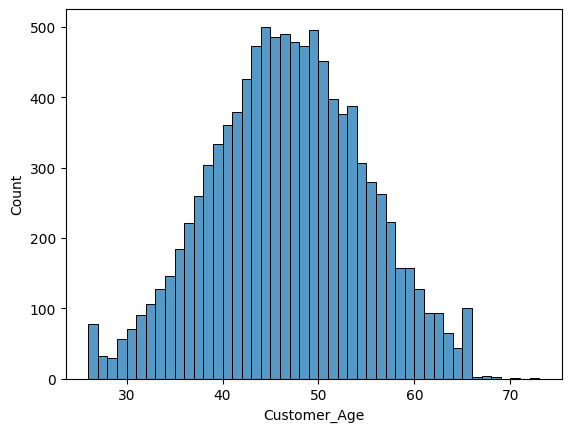

In [10]:
sns.histplot(data = data, x='Customer_Age')

Se grafica la columna 'Gender' para observar su distribución. De ésta se puede observar que se tienen valores extremos outliers.

<Axes: xlabel='Gender', ylabel='Count'>

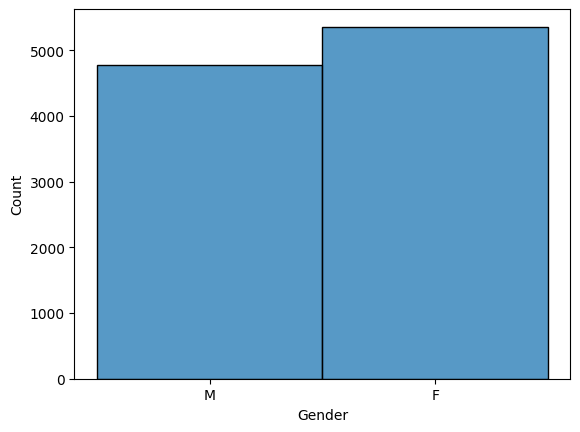

In [11]:
sns.histplot(data=data, x='Gender')

Se grafica la columna 'Card_Category' para observar su distribución.

<Axes: xlabel='Card_Category', ylabel='Count'>

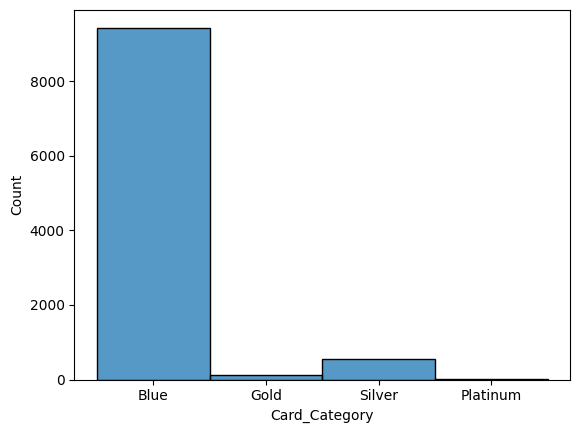

In [12]:
sns.histplot(data=data, x='Card_Category')

Se grafica la columna 'Total_Revolving_Bal' para observar su distribución.

<Axes: xlabel='Total_Revolving_Bal', ylabel='Count'>

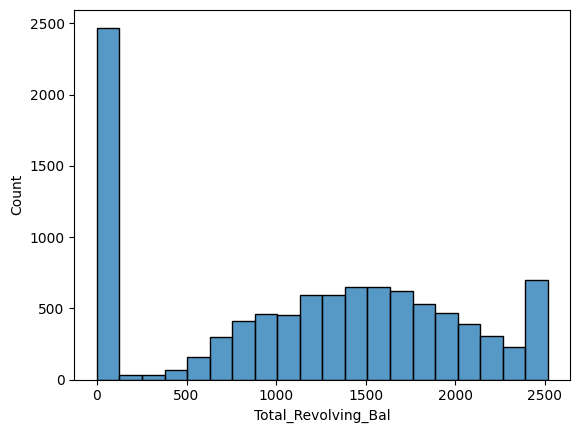

In [13]:
sns.histplot(data=data, x='Total_Revolving_Bal')

Del dataset general, se seleccionan las columnas a analizar ['Customer_Age', 'Gender', 'Card_Category', 'Total_Revolving_Bal'] y se asignan a la variable data_clean

In [14]:
data_clean = data[['Customer_Age', 'Gender', 'Card_Category', 'Total_Revolving_Bal']]
data_clean

,Customer_Age,Gender,Card_Category,Total_Revolving_Bal
0,45,M,Blue,777
1,49,F,Blue,864
2,51,M,Blue,0
3,40,F,Blue,2517
4,40,M,Blue,0
...,...,...,...,...
10122,50,M,Blue,1851
10123,41,M,Blue,2186
10124,44,F,Blue,0
10125,30,M,Blue,0


### Tipos de variables

Se determina el tipo de variables. Se crea la función getDateColTypes para la clasificación.

In [15]:
# Tipo de Variables
def getDateColTypes (df):
    categoricas=[]
    continuas=[]
    discretas=[]

    for colName in df.columns:
        if(df[colName].dtype=='object'):
            categoricas.append(colName)
        else:
            if((df[colName].dtype=='int64')or (df[colName].dtype=='float64')or (df[colName].dtype=='uint8')):
                if (len(df[colName].unique())<=30):
                    discretas.append(colName)
                else:
                    continuas.append(colName)
    return categoricas, continuas, discretas

In [16]:
# Obtener tipos de variables
categoricas, continuas, discretas=getDateColTypes(data_clean)

#### 1. Variables categóricas

In [17]:
# Variables categoricas
categoricas

['Gender', 'Card_Category']

In [18]:
# Obtener de las variables categoricas la cantidad de valores unicos
for var in categoricas:
    print(f'{var}: {data_clean[var].nunique()}')

Gender: 2
Card_Category: 4


Se realizará One Hot Encoding para la variable Gender

In [19]:
# One Hot Encoding a la variable 'Gender' (el resto tiene muy elevado la cantidad de valores unicos para OHE)

ohe_gender=pd.get_dummies(data_clean['Gender'],drop_first=True)

data_clean['Gender']=ohe_gender # Female: 0, Male: 1

C:\Users\lgutierrez\AppData\Local\Temp\ipykernel_33648\3141053355.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Gender']=ohe_gender # Female: 0, Male: 1


In [20]:
# Frecuency Encoding a las variables: merchant , category, city , state, job
frecuency=['Card_Category']

for var in frecuency:

    mapper=(data_clean[var].value_counts().sort_values(ascending=False)).to_dict()

    data_clean[var]= data_clean[var].map(mapper)

C:\Users\lgutierrez\AppData\Local\Temp\ipykernel_33648\3514288598.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[var]= data_clean[var].map(mapper)


Se extraen las características y estadísticas generales del dataset nuevo.

In [21]:
data_clean.describe()

,Customer_Age,Gender,Card_Category,Total_Revolving_Bal
count,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,0.470919,8823.933741,1162.814061
std,8.016814,0.499178,2262.400386,814.987335
min,26.000000,0.000000,20.000000,0.000000
25%,41.000000,0.000000,9436.000000,359.000000
50%,46.000000,0.000000,9436.000000,1276.000000
75%,52.000000,1.000000,9436.000000,1784.000000
max,73.000000,1.000000,9436.000000,2517.000000


Se visualiza el dataset data_clean

In [22]:
data_clean

,Customer_Age,Gender,Card_Category,Total_Revolving_Bal
0,45,1,9436,777
1,49,0,9436,864
2,51,1,9436,0
3,40,0,9436,2517
4,40,1,9436,0
...,...,...,...,...
10122,50,1,9436,1851
10123,41,1,9436,2186
10124,44,0,9436,0
10125,30,1,9436,0


Se obtienen nuevamente los tipos de variables a utilizar

In [23]:
# Obtener nuevamente tipos de variables
categoricas, continuas, discretas=getDateColTypes(data_clean)

In [24]:
print(f'discretas: {discretas}')
print(f'continuas: {continuas}')
print(f'categoricas: {categoricas}')

discretas: ['Gender', 'Card_Category']
continuas: ['Customer_Age', 'Total_Revolving_Bal']
categoricas: []


In [25]:
# Variables Discretas
data_clean[discretas].describe()

,Gender,Card_Category
count,10127.000000,10127.000000
mean,0.470919,8823.933741
std,0.499178,2262.400386
min,0.000000,20.000000
25%,0.000000,9436.000000
50%,0.000000,9436.000000
75%,1.000000,9436.000000
max,1.000000,9436.000000


In [26]:
# Variables Continuas
data_clean[continuas].describe()

,Customer_Age,Total_Revolving_Bal
count,10127.000000,10127.000000
mean,46.325960,1162.814061
std,8.016814,814.987335
min,26.000000,0.000000
25%,41.000000,359.000000
50%,46.000000,1276.000000
75%,52.000000,1784.000000
max,73.000000,2517.000000


In [27]:
# Buscar normalidad de las variables continuas de forma grafica

def plot_density_qq(dataset,var):
    '''Esta funcion muestra la grafica de densidad y el plot QQ para verificar normalidad'''
    plt.figure(figsize=(15,6))

    plt.subplot(1,2,1)
    dataset[var].hist(bins=30)

    plt.subplot(1,2,2)
    stats.probplot(dataset[var],dist='norm',plot=plt)

    plt.show()

Customer_Age


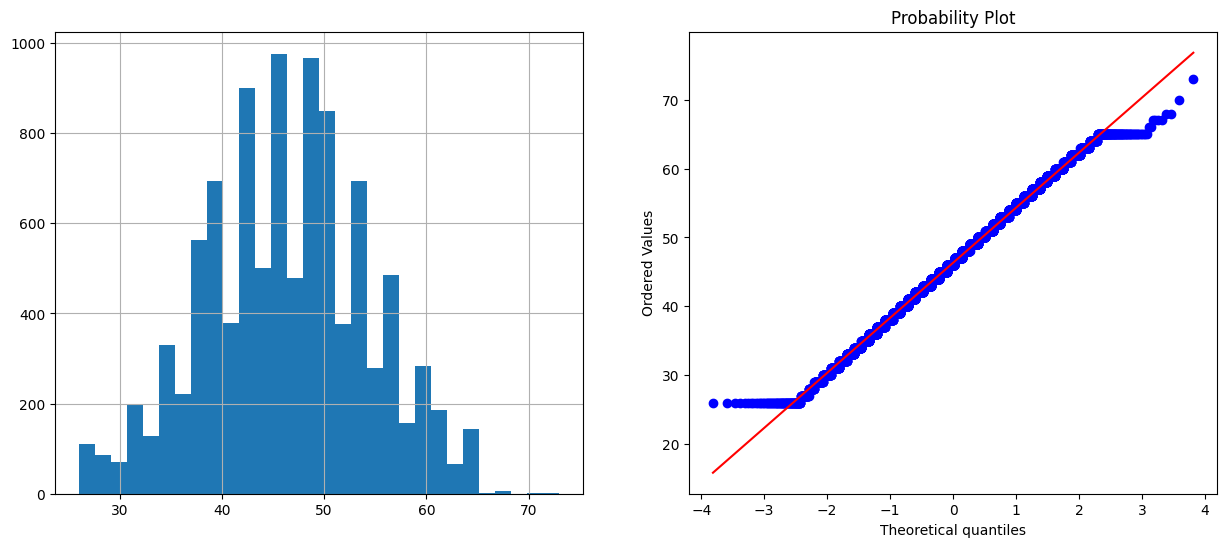

Total_Revolving_Bal


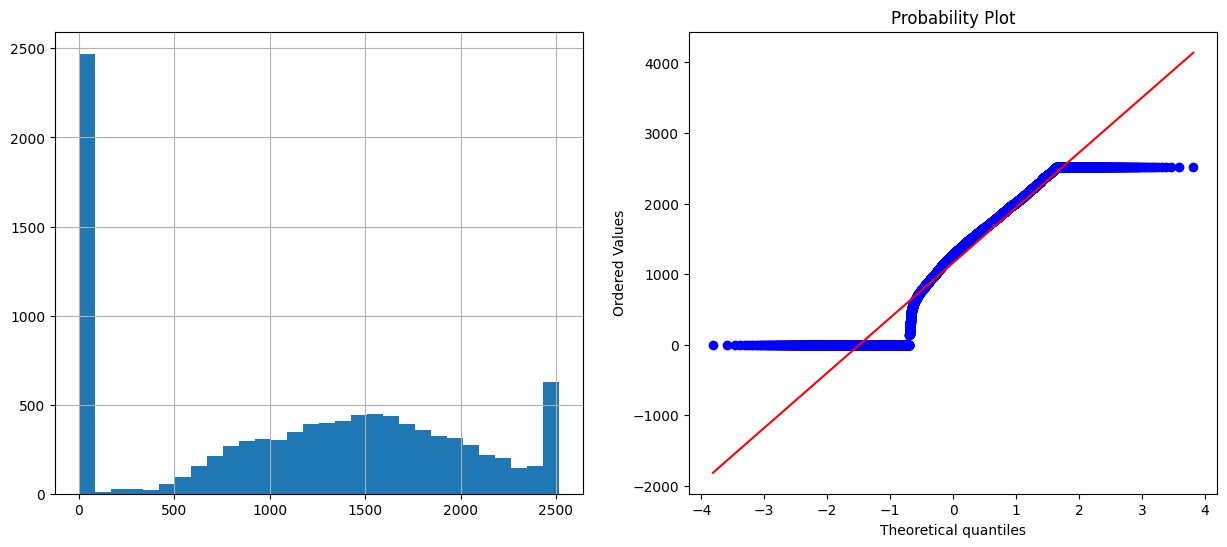

In [28]:
for var in continuas:
    print(var)
    plot_density_qq(data_clean,var)

Para poder tratar los outliers, se utilizará el método IQR (Rango inter cuartil). Donde se calcula los rangos Q1 y Q3 de cada columna y se extraen los datos que estén dentro de los valores. Se seleccionan las columnas 'Customer_Age' y 'Total_Revolving_Bal' ya que son las columnas contínuas mientras que las otras columnas son el resultado de codificación de categóricas.

Método IQR

In [29]:
columnas = ['Customer_Age', 'Total_Revolving_Bal']
for col in columnas:
    column = data_clean[col]
 
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)

    IQR = Q3 - Q1
    
    umbral_inferior = Q1 - 1.5 * IQR
    umbral_superior = Q3 + 1.5 * IQR

    data_clean[col + '_outliers'] = (column < umbral_inferior) | (column > umbral_superior)

    #temp[col + '_outliers'] = ((column < umbral_inferior) | (column > umbral_superior))

    print(f'{Q1 =} {Q3=} {IQR =} {umbral_inferior = } {umbral_superior =}')

Q1 =41.0 Q3=52.0 IQR =11.0 umbral_inferior = 24.5 umbral_superior =68.5
Q1 =359.0 Q3=1784.0 IQR =1425.0 umbral_inferior = -1778.5 umbral_superior =3921.5


C:\Users\lgutierrez\AppData\Local\Temp\ipykernel_33648\3888192489.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[col + '_outliers'] = (column < umbral_inferior) | (column > umbral_superior)
C:\Users\lgutierrez\AppData\Local\Temp\ipykernel_33648\3888192489.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[col + '_outliers'] = (column < umbral_inferior) | (column > umbral_superior)


Se observa el dataset data_clean con las columnas indicando los outliers.

In [30]:
data_clean

,Customer_Age,Gender,Card_Category,Total_Revolving_Bal,Customer_Age_outliers,Total_Revolving_Bal_outliers
0,45,1,9436,777,False,False
1,49,0,9436,864,False,False
2,51,1,9436,0,False,False
3,40,0,9436,2517,False,False
4,40,1,9436,0,False,False
...,...,...,...,...,...,...
10122,50,1,9436,1851,False,False
10123,41,1,9436,2186,False,False
10124,44,0,9436,0,False,False
10125,30,1,9436,0,False,False


Del dataset data_clean, se agrupan los valores de la columna 'Customer_Age_outliers' con el objetivo de determinar la proporción que se tiene

In [31]:
data_clean.groupby(by='Customer_Age_outliers').count()

,Customer_Age,Gender,Card_Category,Total_Revolving_Bal,Total_Revolving_Bal_outliers
Customer_Age_outliers,,,,,
False,10125,10125,10125,10125,10125
True,2,2,2,2,2


Del dataset data_clean, se agrupan los valores de la columna 'Total_Revolving_Bal_outliers' con el objetivo de determinar la proporción que se tiene. 

In [32]:
data_clean.groupby(by='Total_Revolving_Bal_outliers').count()

,Customer_Age,Gender,Card_Category,Total_Revolving_Bal,Customer_Age_outliers
Total_Revolving_Bal_outliers,,,,,
False,10127,10127,10127,10127,10127


Se crea un dataframe sin Outliers

In [33]:
data_noout =  data_clean[data_clean['Customer_Age_outliers'] == False]
data_noout = data_noout[data_noout['Total_Revolving_Bal_outliers'] == False]
data_noout.reset_index(drop=True)

,Customer_Age,Gender,Card_Category,Total_Revolving_Bal,Customer_Age_outliers,Total_Revolving_Bal_outliers
0,45,1,9436,777,False,False
1,49,0,9436,864,False,False
2,51,1,9436,0,False,False
3,40,0,9436,2517,False,False
4,40,1,9436,0,False,False
...,...,...,...,...,...,...
10120,50,1,9436,1851,False,False
10121,41,1,9436,2186,False,False
10122,44,0,9436,0,False,False
10123,30,1,9436,0,False,False


Se valida la estructura y estadísticas del DataFrame nuevo

In [34]:
data_noout.describe()

,Customer_Age,Gender,Card_Category,Total_Revolving_Bal
count,10125.000000,10125.000000,10125.000000,10125.000000
mean,46.320988,0.470815,8823.812840,1162.784988
std,8.009765,0.499172,2262.607486,815.061058
min,26.000000,0.000000,20.000000,0.000000
25%,41.000000,0.000000,9436.000000,357.000000
50%,46.000000,0.000000,9436.000000,1276.000000
75%,52.000000,1.000000,9436.000000,1784.000000
max,68.000000,1.000000,9436.000000,2517.000000


Se grafica la columna 'Customer_Age' sin outliers

<Axes: xlabel='Customer_Age', ylabel='Count'>

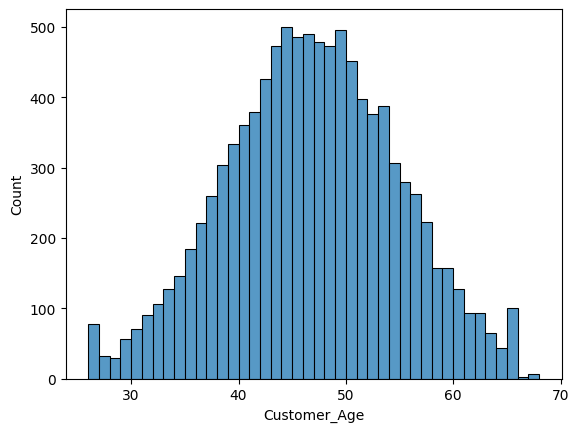

In [35]:
sns.histplot(data=data_noout, x='Customer_Age')

Se grafica la columna 'Total_Revolving_Bal' sin outliers

<Axes: xlabel='Total_Revolving_Bal', ylabel='Count'>

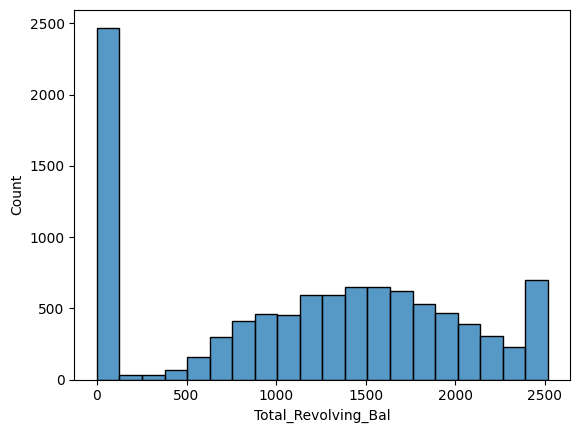

In [36]:
sns.histplot(data=data_noout, x = 'Total_Revolving_Bal')

Se grafica la columna 'Gender' sin outliers

<Axes: xlabel='Gender', ylabel='Count'>

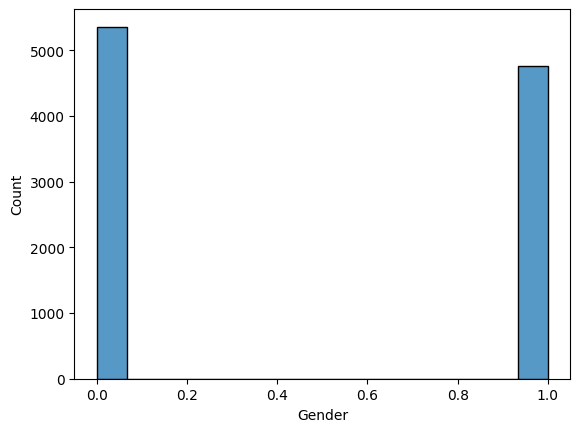

In [37]:
sns.histplot(data=data_noout, x='Gender')

Se grafica la columna 'Card_Category' sin outliers

<Axes: xlabel='Card_Category', ylabel='Count'>

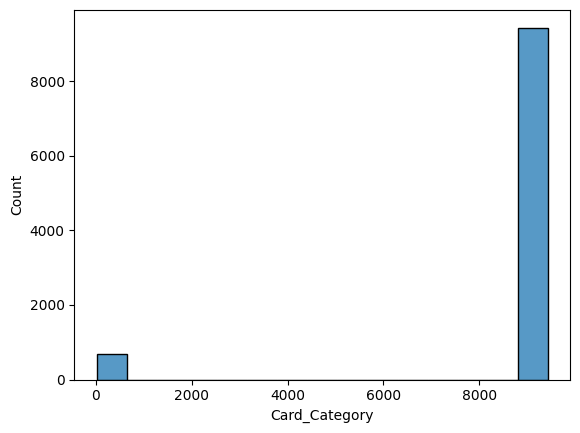

In [38]:
sns.histplot(data=data_noout, x='Card_Category')

Del dataset data_clean, se agrupan los valores de la columna 'Customer_Age_outliers' con el objetivo de determinar la proporción que se tiene

In [39]:
data_clean.groupby(by='Customer_Age_outliers').count()

,Customer_Age,Gender,Card_Category,Total_Revolving_Bal,Total_Revolving_Bal_outliers
Customer_Age_outliers,,,,,
False,10125,10125,10125,10125,10125
True,2,2,2,2,2


Del dataset data_clean, se agrupan los valores de la columna 'Total_Revolving_Bal_outliers' con el objetivo de determinar la proporción que se tiene

In [40]:
data_clean.groupby(by = "Total_Revolving_Bal_outliers").count()

,Customer_Age,Gender,Card_Category,Total_Revolving_Bal,Customer_Age_outliers
Total_Revolving_Bal_outliers,,,,,
False,10127,10127,10127,10127,10127


De la librería sklearn.preprocessing, se extrae el módulo power_transform para normalizar los datos.

In [41]:
from sklearn.preprocessing import power_transform

Se valida el dataset data_noout, el cual no tiene outliers

In [42]:
dfSummary(data_noout)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Customer_Age[int64],Mean (sd) : 46.3 (8.0)min < med < max:26.0 < 46.0 < 68.0IQR (CV) : 11.0 (5.8),43 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACkklEQVR4nO3cQYriQBSA4VdjK1EhQQTdeYGBWbj0EHPYOcIsPIE3cCeIREx3MMb0ohlwwOnWpDK+V/7fPt1Z/AQrqXquqioBtPv26BsAbvHy6BsIkXOuLyK9mpcfq6p683k/ISBUz5xz/fF4/DOO41Gd6/f7/c4594tY/0ao/vXiOB4tFou3JEnyey5M0zRaLpej7XbbExFCvUCoLUmSJJ9MJq81Lu17v5kAsJiCCYQKEwgVJhAqTCBUmECoMIHXU//Q4OtSfD6fu77v59kR6hVNvi4VRRGVZfk9z/PfIlLnPSquINTran9dWq/Xo9VqNTidTp22bu4ZEeon6nxd2u12fFlqAYspmECoMIFQYQKhwgRChQmEChMIFSYQKkwgVJgQ7JephkeW2ViiTJChNj2yzMYSfYIMVRpsKhFhY4lGoYYqIvWPLLOxRB8WUzAh6CeqRWVZdkUkds7V/RNBzq4iVEWyLOsWRfFjNpt1Op3O3b+tRcKdXUWoihyPx5coigbz+TyfTqe7e68PeXYVoSo0HA7rzq0SCXR2FYspmECoMIFQYQKhwgRChQmEChMIFSaofo/KoDL8oTZUBpXhktpQhUFluKA5VBFhUBk+sJiCCeqfqLhPw/2saveyEmpAmu5n1byXlVAD0mQ/q/a9rIQaoAb7WdUuQllMwQRChQmEChMIFSYQKkxoddXPRD340lqoTNSDT20+UZmoB29af+HPRD07NM+94ssURET/3CtChYjon3v1ZaicW3ouWudefRoq55agxVdPVM4tQYWbfqNybgmPxmIK3rR5DIZQ4UXbx2AIFV60fQyGUOFVW8dgbgo1TdPo3v96OBwiEZEsy6LNZjP4n9db/d9W77vp9bf09Q5UlrL3VjKVBgAAAABJRU5ErkJggg=="">",0(0.0%)
2,Gender[uint8],Mean (sd) : 0.5 (0.5)min < med < max:0.0 < 0.0 < 1.0IQR (CV) : 1.0 (0.9),2 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABfElEQVR4nO3YQWoCMRiG4aQMopsZRPAwHqKH7SG8jZS4qFLQ6a6bQtVRaT94nnXyk8XLDEkdx7HAf/fy1weAa3SXFtRaF6WU2cT5n+M4HibuhW+/hlprXaxWq9e+75dThu/3+/da65tYudelL+qs7/vlZrM5DMNwvGVwa22+3W6Xu91uVkoRKne5+OsvpZRhGI7r9fpjwvzFhD3wg8sUEYRKBKESQahEuOoyBdd45pu7UHmIZ7+5C5VHeeqbu1B5qGe9ubtMEUGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRhEoEoRJBqEQQKhGESgShEkGoRBAqEYRKBKESQahEECoRumsWtdbmtw5urc1Pp1NXSulrrTcfjDj9+XzuprZyac0X2T9OfRBqyPoAAAAASUVORK5CYII="">",0(0.0%)
3,Card_Category[int64],Mean (sd) : 8823.8 (2262.6)min < med < max:20.0 < 9436.0 < 9436.0IQR (CV) : 0.0 (3.9),4 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABtUlEQVR4nO3XTYqDQBCG4apBRDfdiOBhPEQOm0N4GwntIkog6dnNZpj8dDJkvuF9tlpFL15a9JyzAX/dx7sPANyjevcB8H+4e2tmdeH4Kee8/vSQUPES7t72fb8LIXQl88uyHNx9/1OshIpXqUMI3TiOa4xxe2QwpdRM09TN81ybGaHi98UYt2EYjgWj7bWH/ExBAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCQnXrBXdvzawu3H/KOa+Fs8CXq6G6e9v3/S6E0JUsX5bl4O57YsWzbt2odQihG8dxjTFujyxOKTXTNHXzPNdmRqh4ys1Pv5lZjHEbhuFYsL8tmAG+4WcKEu66UVNKzaOLU0rN+XyuzCy4+8MHg5xwuVyq0lZuvfMJD+JOfTNZZYEAAAAASUVORK5CYII="">",0(0.0%)
4,Total_Revolving_Bal[int64],Mean (sd) : 1162.8 (815.1)min < med < max:0.0 < 1276.0 < 2517.0IQR (CV) : 1427.0 (1.4),"1,974 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy88F64QAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACs0lEQVR4nO3dPY7aQBiA4W/CggxItvgRdFxgpS2QaDhAyhw2R0hBkZob0CEhZISzFsZ4q0SKwi54xrP4c96n3jEuXoPHOxqboigEqLsvjz4B4B5Pt/7AGNMVkY7l8U9FUbxajgX++DBUY0x3NBp9C8NwYHPww+GwN8Z8J1a4uvWN2gnDcLBcLl+jKErLHDiO42C1Wg12u11HRAgVTm7+9IuIRFGUTiaTXxbH71qMAf7BZAoqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChwl27+eHzOG6cLNLQzZMJ1QOH2ILhcPg1iqK+7Wc3dfNkQq2Yyy7dWZYFIvK8WCx+jsfjQ9nxTd48mVCrZ71L92azGazX614QBJnlxskiDd08mVA9sdmle7/fNzKyKjDrhwp8o77DYUIUXi6XdtXn878j1CtcJ0R5nj+nafpDRGzvM6

Se define nuevamente el dataset sin las columnas de outliers

In [43]:
data_noout = data_noout[['Customer_Age', 'Gender' , 'Card_Category', 'Total_Revolving_Bal']]
data_noout

,Customer_Age,Gender,Card_Category,Total_Revolving_Bal
0,45,1,9436,777
1,49,0,9436,864
2,51,1,9436,0
3,40,0,9436,2517
4,40,1,9436,0
...,...,...,...,...
10122,50,1,9436,1851
10123,41,1,9436,2186
10124,44,0,9436,0
10125,30,1,9436,0


Se realiza la transformación 'yeo-johnson' para normalizar las columnas del nuevo dataset y se visualiza. Esto debido a que se tienen valores 0 en en dataset.

In [44]:
data_bc = power_transform(X=data_noout, method='yeo-johnson')
data_bc = pd.DataFrame(data_bc, columns=data_noout.columns)
data_bc

,Customer_Age,Gender,Card_Category,Total_Revolving_Bal
0,-0.168626,1.060178,0.270639,-0.003582
1,0.331428,-0.943238,0.270639,0.076384
2,0.582108,1.060178,0.270639,-1.665967
3,-0.791055,-0.943238,0.270639,1.113897
4,-0.791055,1.060178,0.270639,-1.665967
...,...,...,...,...
10120,0.456715,1.060178,0.270639,0.767046
10121,-0.666818,1.060178,0.270639,0.949261
10122,-0.293354,-0.943238,0.270639,-1.665967
10123,-2.025725,1.060178,0.270639,-1.665967


Se visualiza la distribución de la columna 'Customer_Age'

<Axes: xlabel='Customer_Age', ylabel='Count'>

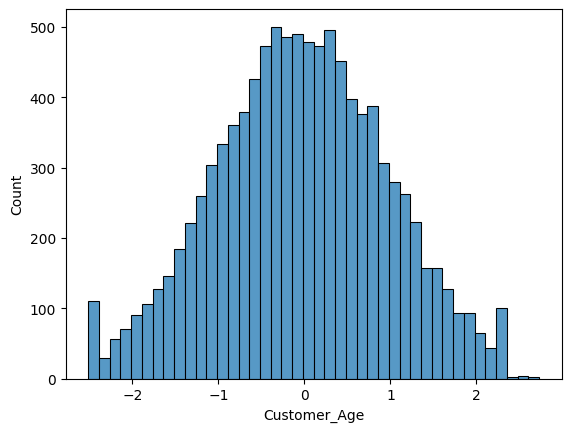

In [45]:
sns.histplot(data_bc,x= 'Customer_Age')

Se visualiza la distribución de la columna 'Gender'

<Axes: xlabel='Gender', ylabel='Count'>

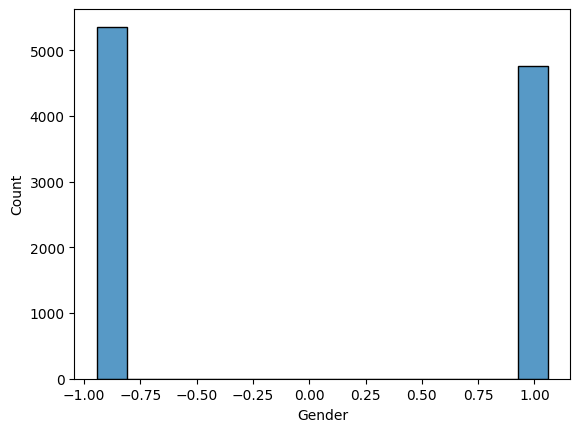

In [46]:
sns.histplot(data_bc,x= 'Gender')

Se visualiza la distribución de la columna 'Card_Category'

<Axes: xlabel='Card_Category', ylabel='Count'>

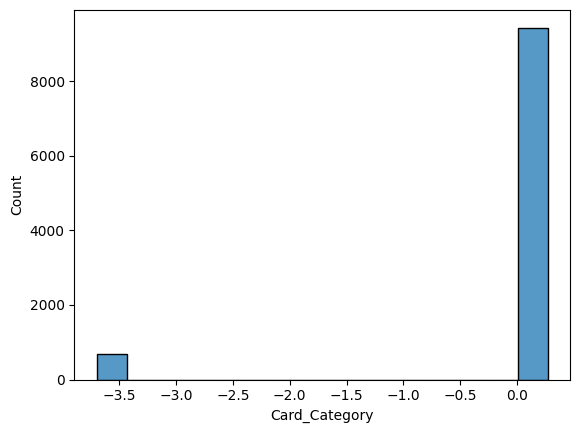

In [47]:
sns.histplot(data_bc,x= 'Card_Category')

Se visualiza la distribución de la columna 'Total_Revolving_Bal'

<Axes: xlabel='Total_Revolving_Bal', ylabel='Count'>

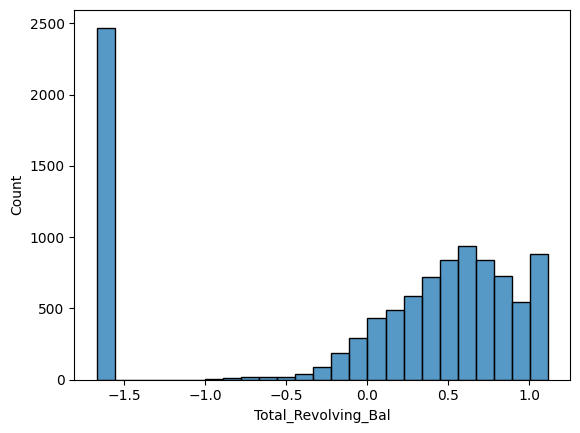

In [48]:
sns.histplot(data_bc,x= 'Total_Revolving_Bal')

Se extraen los estadísticos generales del dataset para observar el comportamiento del dataset normalizado.

In [49]:
data_bc.describe()

,Customer_Age,Gender,Card_Category,Total_Revolving_Bal
count,1.012500e+04,1.012500e+04,1.012500e+04,1.012500e+04
mean,-2.175489e-16,2.133383e-16,-2.694799e-16,-3.368499e-17
std,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00
min,-2.515087e+00,-9.432379e-01,-3.694960e+00,-1.665967e+00
25%,-6.668177e-01,-9.432379e-01,2.706394e-01,-4.930331e-01
50%,-4.378080e-02,-9.432379e-01,2.706394e-01,4.024785e-01
75%,7.076039e-01,1.060178e+00,2.706394e-01,7.283419e-01
max,2.728254e+00,1.060178e+00,2.706394e-01,1.113897e+00


Se carga de la librería sklearn.cluster el módulo KMeans

In [50]:
from sklearn.cluster import KMeans

Se extrae la inercia y el número de clusters del modelo iterado

In [51]:
inercia = []
ks = []

for k in range(1,25):
    modelo_iterado = KMeans(n_clusters = k, random_state = 5)
    modelo_iterado.fit(data_bc)
    inercia.append(modelo_iterado.inertia_)
    ks.append(k)

c:\Users\lgutierrez\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\lgutierrez\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\lgutierrez\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\lgutierrez\AppData\Local\Programs\Python\Python311\Lib\site-p

Se crea el diccionario codo con número de inercia y número de clusters.

In [52]:
codo = {
    'inercia': inercia,
    'k': ks
}

codo = pd.DataFrame(codo)


Se grafica la tabla de cluser vs inercia para poder aplicar el método del codo.

<Axes: xlabel='k', ylabel='inercia'>

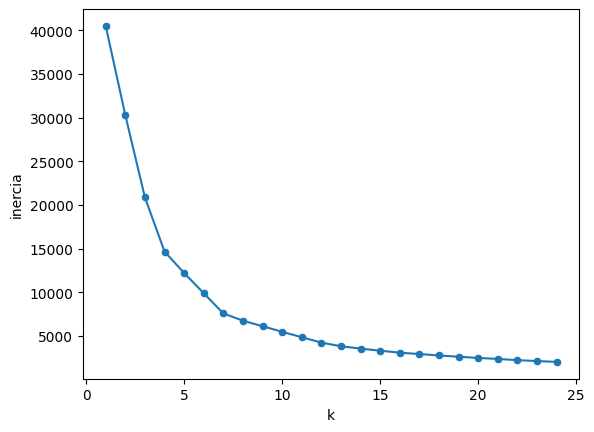

In [53]:
sns.scatterplot(data=codo,x='k',y='inercia',markers=True)
sns.lineplot(data=codo, x='k', y='inercia',)

Se realiza el fit al modelo con n_clusters = 5.

In [54]:
modelo = KMeans(n_clusters=5,random_state = 10)
modelo.fit(data_bc)

c:\Users\lgutierrez\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=10)

Se obtiene una tabla con los datos del dataset y la columna cluster

In [55]:
data_noout['cluster'] = modelo.labels_
data_noout

,Customer_Age,Gender,Card_Category,Total_Revolving_Bal,cluster
0,45,1,9436,777,2
1,49,0,9436,864,4
2,51,1,9436,0,0
3,40,0,9436,2517,1
4,40,1,9436,0,0
...,...,...,...,...,...
10122,50,1,9436,1851,2
10123,41,1,9436,2186,2
10124,44,0,9436,0,0
10125,30,1,9436,0,0


Se agrupa el modelo para contar el número de registros que se encuentran por número de clusters.

In [56]:
data_noout.groupby(by='cluster').count()

,Customer_Age,Gender,Card_Category,Total_Revolving_Bal
cluster,,,,
0,2335,2335,2335,2335
1,1867,1867,1867,1867
2,3324,3324,3324,3324
3,691,691,691,691
4,1908,1908,1908,1908
